# Домашняя работа 9. Прогнозирование методом экспоненциального сглаживания

Лазарев Эдуард Артемович
N33471

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import preprocessing

In [2]:
# Загружаем данные
df = pd.read_csv('wine_Austral2.dat', sep='\t', usecols=["red"])
len(df)

174

Проверяем правильность данных

In [3]:
df

,red
0,464
1,675
2,703
3,887
4,1139
...,...
169,1728
170,2201
171,2455
172,2204


In [4]:
df.dtypes

red    int64
dtype: object

Выбираем только один столбец с красным вином

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 864x576 with 0 Axes>

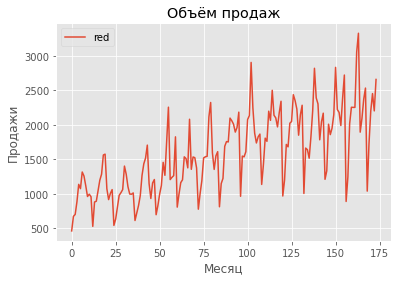

In [5]:
#Построим графики и определим,тип тренда (линейный или нет) и тип сезонности ( аддитивный или мультипликативный)
#  Активируем библиотеки, необходимые для работы
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import os
from statsmodels.tsa.api import ExponentialSmoothing
#  Указываем размер картинки
plt.figure(figsize=(12, 8))
df.plot()
plt.xlabel(u'Месяц')
plt.ylabel(u'Продажи')
plt.title(u'Объём продаж')
plt.show()

По этому графику можно определить, что тренд линейный, а сезонность мультипликативная. Можно проверить сезонность, взяв логарифм от функции. Если сезонные отклонения будут одинаковыми, то это докажет мультипликативность.

<Figure size 1296x576 with 0 Axes>

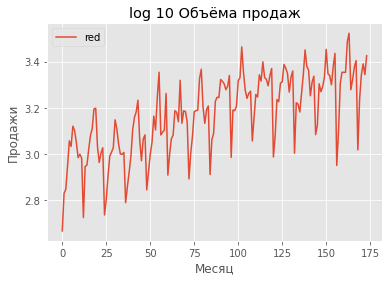

In [6]:
plt.figure(figsize=(18, 8))
np.log10(df).plot()
plt.xlabel(u'Месяц')
plt.ylabel(u'Продажи')
plt.title(u'log 10 Объёма продаж')
plt.show()

Ряд не меняет своего характера, выбросов и пропусков не наблюдается.

In [7]:
#на сколько месяцев прогнозируем + тип сезонности
horizon_ = 8
season_type = 'multiplicative'
#период сезонных отклонений
seas_period_ = 12

test = df['red'][:-horizon_]
test

0       464
1       675
2       703
3       887
4      1139
       ... 
161    2255
162    3057
163    3330
164    1896
165    2096
Name: red, Length: 166, dtype: int64

Прогноз с помощью экспоненциального сглаживания

In [8]:
fit1 = ExponentialSmoothing(test,seasonal_periods=seas_period_ ,
                            trend='additive', seasonal=season_type, damped = True).fit()

In [9]:
# Количество наблюдений
len(test)

166

In [10]:
#  Считаем подгонку и прогноз
fitted_ = fit1.predict(0, len(test) + horizon_ - 1)

In [11]:
#  Смотрим на полученные результаты, проверяем
fitted_

0       496.358118
1       663.405394
2       820.491063
3       856.535141
4       994.729704
          ...     
169    1581.829660
170    1942.221665
171    2060.330150
172    2369.204969
173    2433.292954
Length: 174, dtype: float64

In [12]:
#  Количество наблюдений в прогнозе
len(fitted_)

174

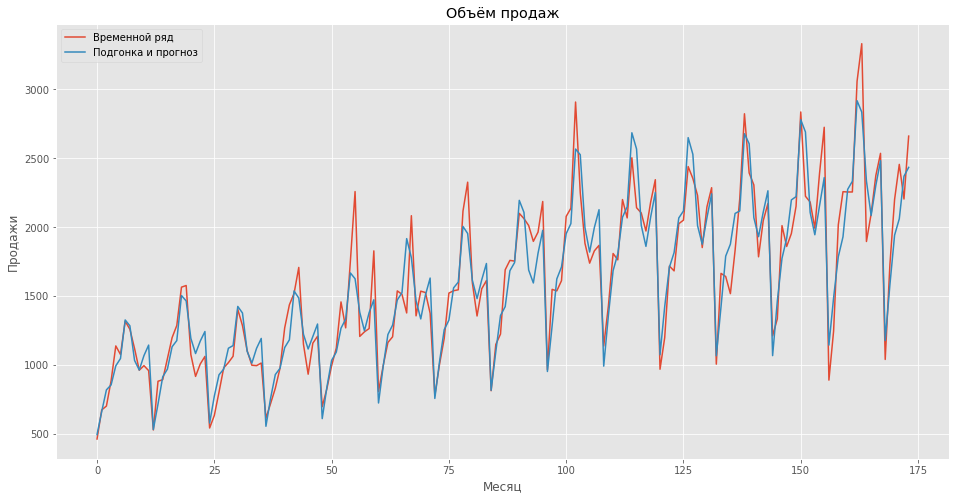

In [13]:
#строим прогноз
plt.figure(figsize=(16,8))
plt.plot(df, label='Временной ряд')
plt.plot(fitted_, label='Подгонка и прогноз')
plt.legend(loc='best')

plt.xlabel(u'Месяц')
plt.ylabel(u'Продажи')
plt.title(u'Объём продаж')

plt.show()

In [14]:
#выводим результаты
fitted_.iloc[len(test) : len(fitted_)]

166    2302.815323
167    2481.657493
168    1178.041572
169    1581.829660
170    1942.221665
171    2060.330150
172    2369.204969
173    2433.292954
dtype: float64

In [15]:
# Оценим качество модели с использованием параметра Mean Absolute Percentage Error
# Используется неидеальная формула.
# Если значения временного ряда могут равняться нулю, формулу надо будет менять

MAPE_exp_smooth = np.mean(np.abs((fitted_.to_numpy() - df['red'].to_numpy())/df['red'].to_numpy()))*100
MAPE_exp_smooth

8.475178211312963

## Вывод

По результатам работы было проведено прогнозирование методом экспоненциального сглаживания на 8 месяцев. Обучена модель и построен график с исходным рядом, подгонкой и прогнозом, по которому можно сделать вывод, что результат весьма точен. Также, тот же вывод можно сделать, глядя на качество модели MAPE.